In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
listings = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/Project/Python_Project_5/listings.csv")
calendar = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/Project/Python_Project_5/calendar.csv")
reviews = pd.read_csv("C:/Users/Admin1/OneDrive/Desktop/Project/Python_Project_5/reviews.csv")

In [2]:
# Check basic info
print("Listings:")
print(listings.head(), listings.info(), "\n")

print("Calendar:")
print(calendar.head(), calendar.info(), "\n")

print("Reviews:")
print(reviews.head(), reviews.info())

Listings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 

In [3]:
# Select important columns
listings_subset = listings[['id','name','neighbourhood_cleansed','room_type',
                             'price','number_of_reviews','review_scores_rating',
                             'availability_365','host_id','host_name','host_since']]

# Clean price column
listings_subset['price'] = listings_subset['price'].replace('[\$,]', '', regex=True).astype(float)

# Check cleaned dataset
listings_subset.head()


C:\Users\Admin1\AppData\Local\Temp\ipykernel_9212\911267416.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_subset['price'] = listings_subset['price'].replace('[\$,]', '', regex=True).astype(float)


,id,name,neighbourhood_cleansed,room_type,price,number_of_reviews,review_scores_rating,availability_365,host_id,host_name,host_since
0,241032,Stylish Queen Anne Apartment,West Queen Anne,Entire home/apt,85.0,207,95.0,346,956883,Maija,2011-08-11
1,953595,Bright & Airy Queen Anne Apartment,West Queen Anne,Entire home/apt,150.0,43,96.0,291,5177328,Andrea,2013-02-21
2,3308979,New Modern House-Amazing water view,West Queen Anne,Entire home/apt,975.0,20,97.0,220,16708587,Jill,2014-06-12
3,7421966,Queen Anne Chateau,West Queen Anne,Entire home/apt,100.0,0,NaN,143,9851441,Emily,2013-11-06
4,278830,Charming craftsman 3 bdm house,West Queen Anne,Entire home/apt,450.0,38,92.0,365,1452570,Emily,2011-11-29


In [4]:
calendar.head()
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['available'] = calendar['available'].map({'t': 1, 'f': 0})
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [11]:
calendar_merged = calendar.merge(
    listings_subset,
    left_on='listing_id',
    right_on='id',
    how='left'
)

calendar_merged.head()


,listing_id,date,available,price_x,id,name,neighbourhood_cleansed,room_type,price_y,number_of_reviews,review_scores_rating,availability_365,host_id,host_name,host_since
0,241032,2016-01-04,1,85.0,241032,Stylish Queen Anne Apartment,West Queen Anne,Entire home/apt,85.0,207,95.0,346,956883,Maija,2011-08-11
1,241032,2016-01-05,1,85.0,241032,Stylish Queen Anne Apartment,West Queen Anne,Entire home/apt,85.0,207,95.0,346,956883,Maija,2011-08-11
2,241032,2016-01-06,0,NaN,241032,Stylish Queen Anne Apartment,West Queen Anne,Entire home/apt,85.0,207,95.0,346,956883,Maija,2011-08-11
3,241032,2016-01-07,0,NaN,241032,Stylish Queen Anne Apartment,West Queen Anne,Entire home/apt,85.0,207,95.0,346,956883,Maija,2011-08-11
4,241032,2016-01-08,0,NaN,241032,Stylish Queen Anne Apartment,West Queen Anne,Entire home/apt,85.0,207,95.0,346,956883,Maija,2011-08-11


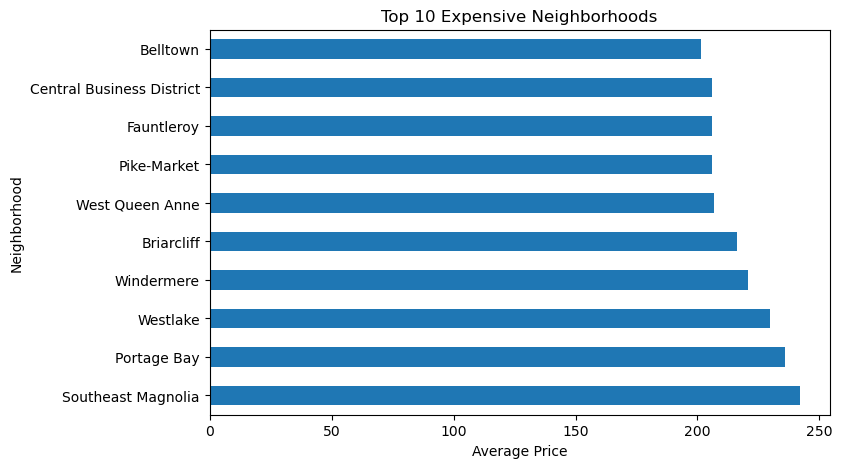

In [15]:
# Top 10 Most Expensive Neighborhoods
top_neighborhoods = (
    calendar_merged.groupby('neighbourhood_cleansed')['price_x']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_neighborhoods.plot(kind='barh', title='Top 10 Expensive Neighborhoods', figsize=(8,5))
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()


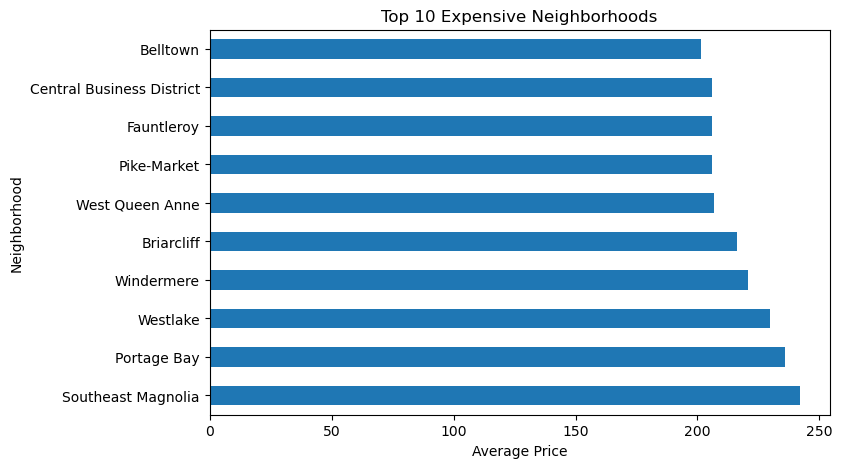

In [17]:
# Top 10 Most Expensive Neighborhoods

top_neighborhoods = (
    calendar_merged.groupby('neighbourhood_cleansed')['price_x']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_neighborhoods.plot(kind='barh', title='Top 10 Expensive Neighborhoods', figsize=(8,5))
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()


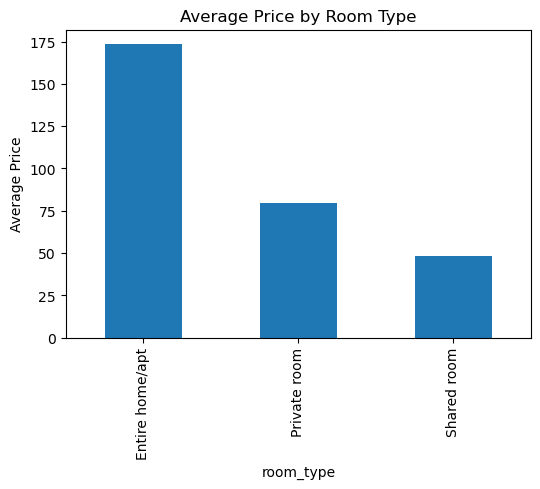

In [18]:
# Room Type Price Comparison

calendar_merged.groupby('room_type')['price_x'].mean().plot(
    kind='bar', 
    title='Average Price by Room Type',
    figsize=(6,4)
)
plt.ylabel('Average Price')
plt.show()

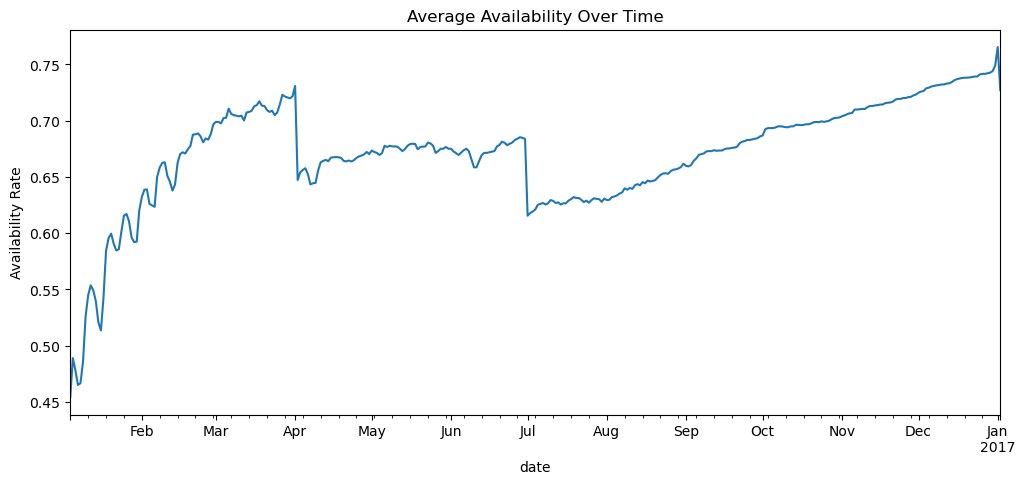

In [19]:
# Availability Trend Over Time

calendar_merged.groupby('date')['available'].mean().plot(
    figsize=(12,5), 
    title='Average Availability Over Time'
)
plt.ylabel('Availability Rate')
plt.show()

In [20]:
# Average Occupancy Rate

occupancy_rate = calendar_merged['available'].mean() * 100
print(f"Average Occupancy Rate: {occupancy_rate:.2f}%")

Average Occupancy Rate: 67.06%


In [21]:
calendar_merged.to_csv("airbnb_seattle_clean.csv", index=False)
print("Merged Airbnb dataset saved as airbnb_seattle_clean.csv")


Merged Airbnb dataset saved as airbnb_seattle_clean.csv
